In [168]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [169]:
df = pd.read_csv("AB_NYC_2019.csv")

In [170]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [171]:
df.shape

(48895, 16)

In [172]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [174]:
import missingno as msno

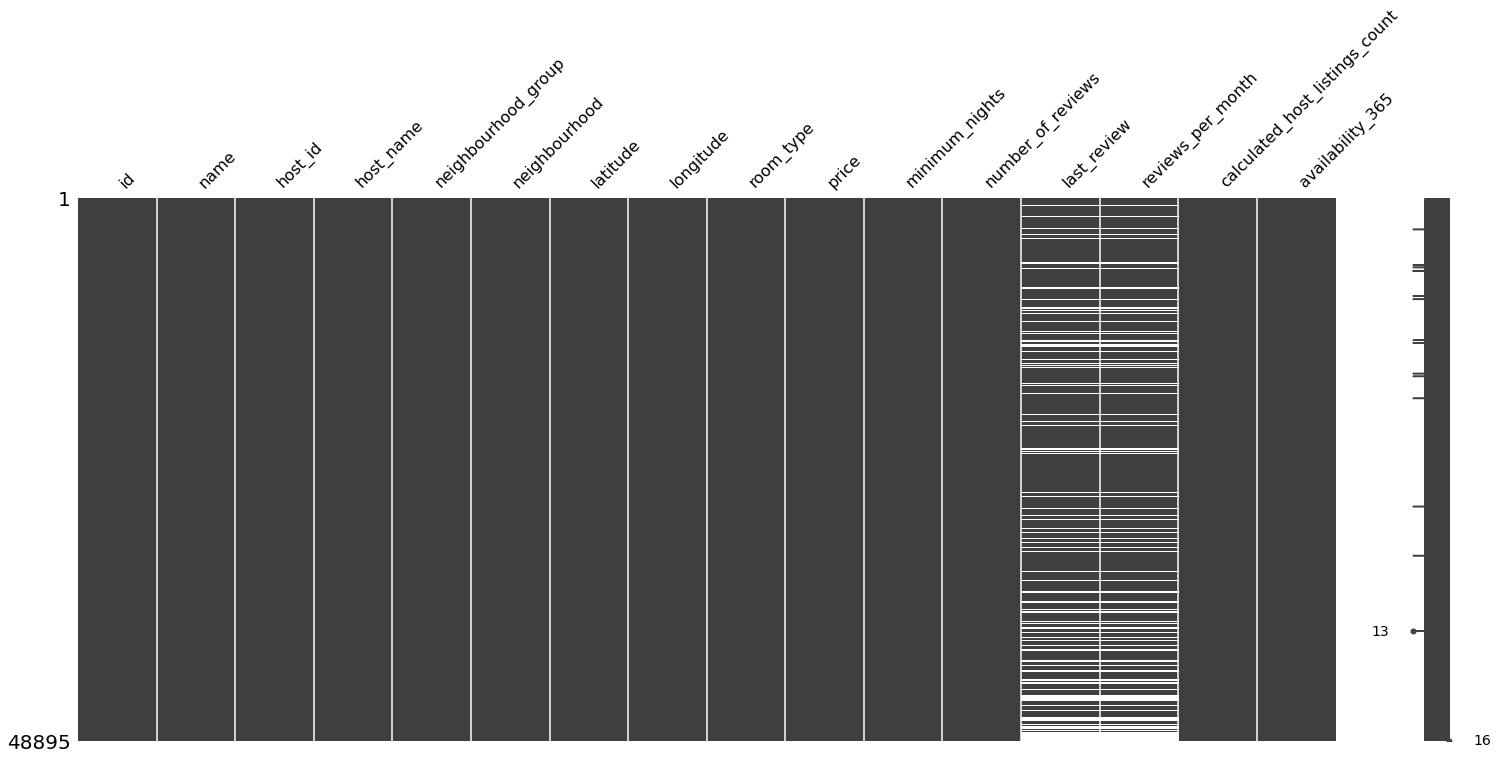

In [175]:
msno.matrix(df)
plt.show()

In [176]:
df['last_review'][0: 10]

0    2018-10-19
1    2019-05-21
2           NaN
3    2019-07-05
4    2018-11-19
5    2019-06-22
6    2017-10-05
7    2019-06-24
8    2017-07-21
9    2019-06-09
Name: last_review, dtype: object

In [177]:
df['reviews_per_month'][0: 10]

0    0.21
1    0.38
2     NaN
3    4.64
4    0.10
5    0.59
6    0.40
7    3.47
8    0.99
9    1.33
Name: reviews_per_month, dtype: float64

In [178]:
df['host_name'].value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [179]:
df['host_name'].value_counts().index[0: 20]

Index(['Michael', 'David', 'Sonder (NYC)', 'John', 'Alex', 'Blueground',
       'Sarah', 'Daniel', 'Jessica', 'Maria', 'Mike', 'Andrew', 'Anna',
       'Chris', 'Laura', 'Melissa', 'Emily', 'Jennifer', 'James', 'Rachel'],
      dtype='object')

In [180]:
df['host_name'].value_counts().values[0: 20]

array([417, 403, 327, 294, 279, 232, 227, 226, 205, 204, 194, 190, 187,
       182, 182, 160, 157, 154, 151, 146], dtype=int64)

In [181]:
def barplot_function(x_value, y_value, data = None, palette = 'viridis'):
    plt.figure(figsize = (10, 10))
    if data:
        sns.barplot(x = x_value, y = y_value, data = data, palette = palette)
    else:
        sns.barplot(x = x_value, y = y_value, data = data, palette = palette)
    plt.show()

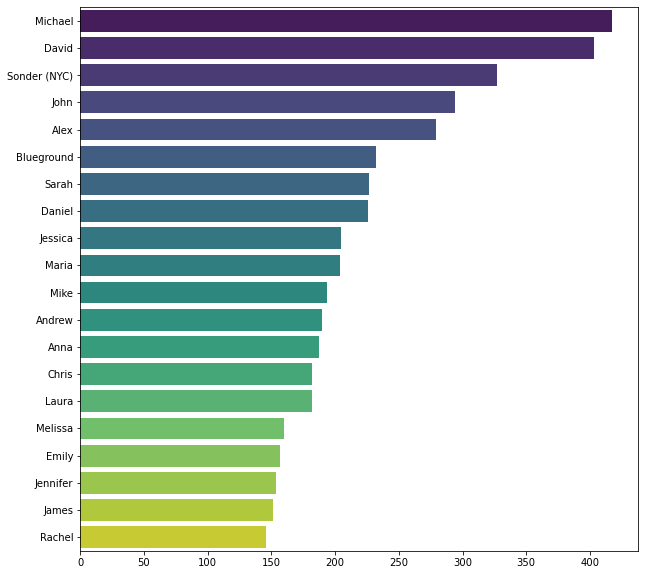

In [182]:
barplot_function(x_value = df['host_name'].value_counts().values[0: 20], y_value = df['host_name'].value_counts().index[0: 20])

In [183]:
print("The total number of differnet hosts is: {}".format(len(df['host_id'].unique())))

The total number of differnet hosts is: 37457


In [184]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [185]:
def kdeplot_function(x_value, dataset, color = 'green'):
    plt.figure(figsize = (10, 5))
    sns.kdeplot(x = x_value, data = dataset, color = color)
    plt.show()

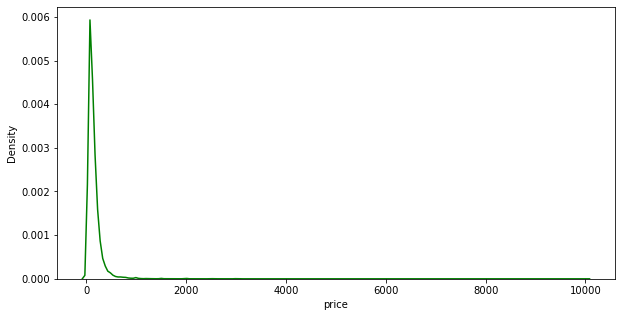

In [186]:
kdeplot_function(x_value = 'price', dataset = df)

In [187]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [188]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

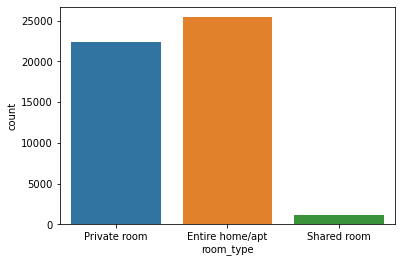

In [189]:
sns.countplot(x = 'room_type', data = df)
plt.show

In [190]:
df['name'].value_counts()

Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Large 1BR Apt. in Williamsburg                         1
Feel at Home                                           1
Spacious Modern Alcove Studio in a Luxury Building     1
Artist's Room in Large Apartment                       1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: name, Length: 47905, dtype: int64

In [191]:
df['host_id'].value_counts()

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
23727216       1
89211125       1
19928013       1
1017772        1
68119814       1
Name: host_id, Length: 37457, dtype: int64

In [192]:
import plotly.express as px
import plotly.graph_objects as go

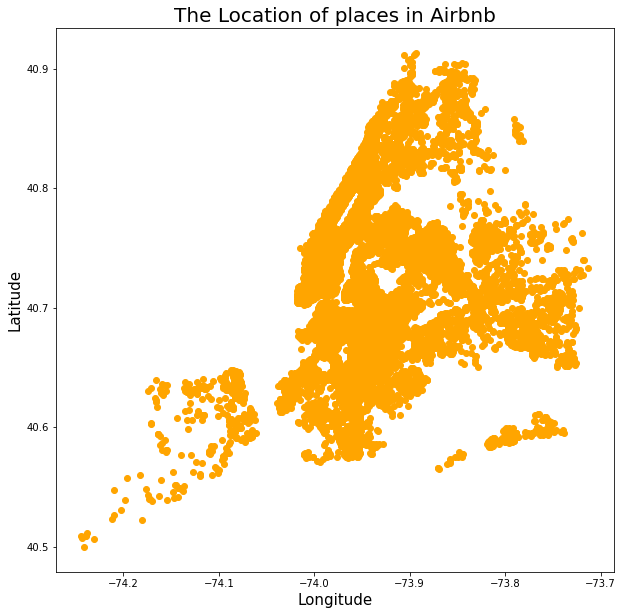

In [193]:
plt.figure(figsize = (10, 10))
plt.scatter(x = df['longitude'], y = df['latitude'], color = 'orange')
plt.xlabel("Longitude", fontsize = 15)
plt.ylabel("Latitude", fontsize = 15)
plt.title("The Location of places in Airbnb", fontsize = 20)
plt.show()

In [194]:
from termcolor import colored

In [195]:
percentage_of_missing_values = np.round(sum(df['last_review'].isna()) / len(df['last_review']) * 100, 2)
missing_values_colored = colored(percentage_of_missing_values, 'blue')
colored_feature = colored('last_review', "green")
print("The percentage of missing values for '" + colored_feature + "' feature is: {}%".format(missing_values_colored))

The percentage of missing values for 'last_review' feature is: 20.56%


In [196]:
percentage_of_missing_values = np.round(sum(df['reviews_per_month'].isna()) / len(df['reviews_per_month']) * 100, 2)
missing_values_colored = colored(percentage_of_missing_values, 'green')
colored_feature = colored('reviews_per_month', "blue")
print("The percentage of missing values for '" + colored_feature + "' feature is: {}%".format(missing_values_colored))

The percentage of missing values for 'reviews_per_month' feature is: 20.56%


In [197]:
date_split = df['last_review'].iloc[0].split('-')

In [198]:
year_first_example = date_split[0]
month_first_example = date_split[1]
day_first_example = date_split[2]

In [199]:
year_first_example

'2018'

In [200]:
month_first_example

'10'

In [201]:
day_first_example

'19'

In [202]:
def date_splitter(data, feature):
    year_list = []
    month_list = []
    day_list = []
    data_copy = data.copy()
    data_copy.dropna(inplace = True)
    for i in range(len(data_copy[feature])):
        data_split = data_copy[feature].iloc[i].split('-')
        year_list.append(data_split[0])
        month_list.append(data_split[1])
        day_list.append(data_split[2])
    return year_list, month_list, day_list

In [203]:
df_copy = df.copy()

In [204]:
years, months, days = date_splitter(df_copy, feature = 'last_review')

In [205]:
from statistics import mode

In [206]:
mode_years = mode(years)
mode_months = mode(months)
mode_days = mode(days)

In [207]:
mode_years 

'2019'

In [208]:
mode_months 

'06'

In [209]:
mode_days

'01'

In [210]:
mode_date = mode_years + '-' + mode_months + '-' + mode_days

In [211]:
mode_date

'2019-06-01'

In [212]:
import numpy as np
from sklearn.impute import SimpleImputer 

In [213]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


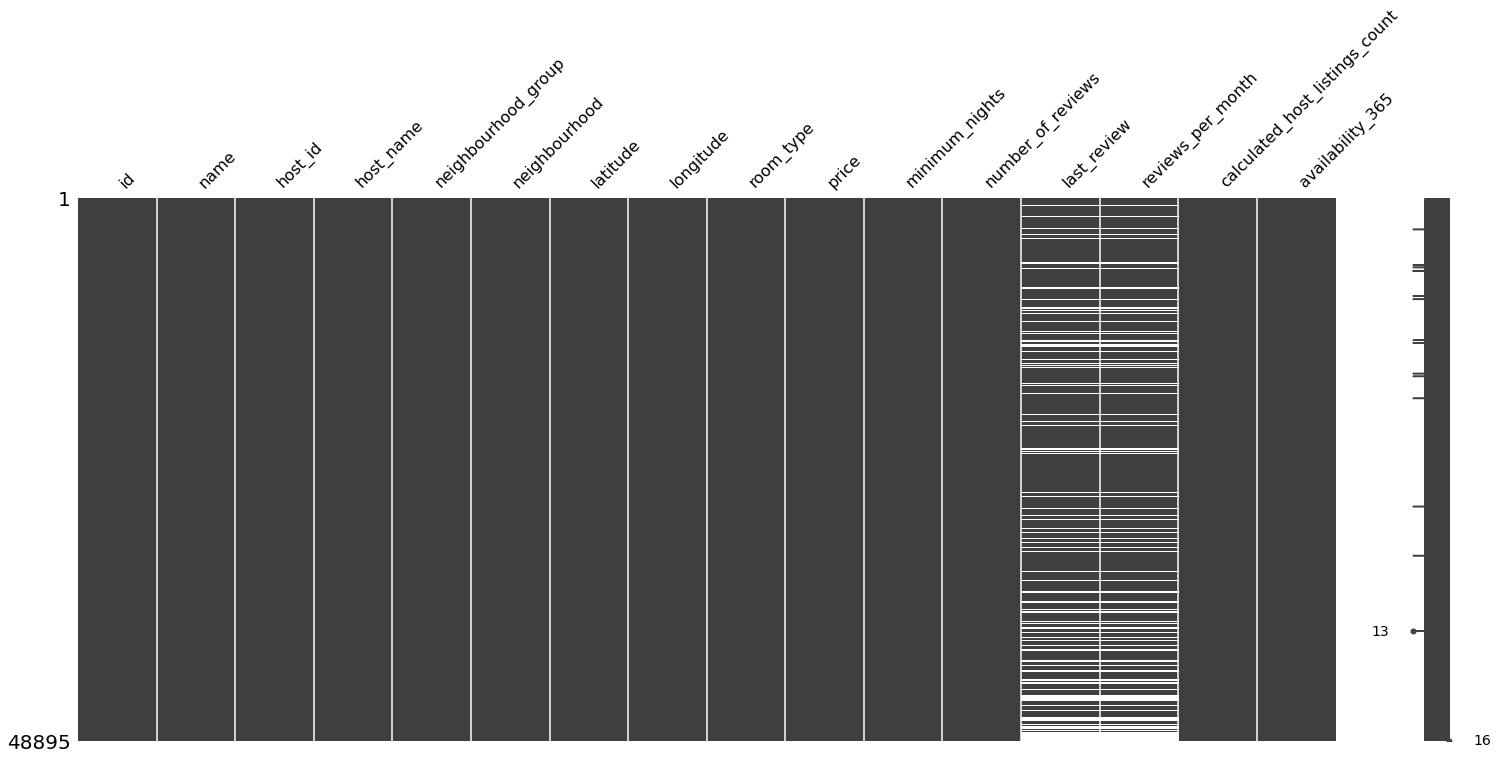

In [214]:
msno.matrix(df_copy)
plt.show()

In [215]:
df_copy['last_review'].fillna(mode_date, inplace = True) 

<AxesSubplot:>

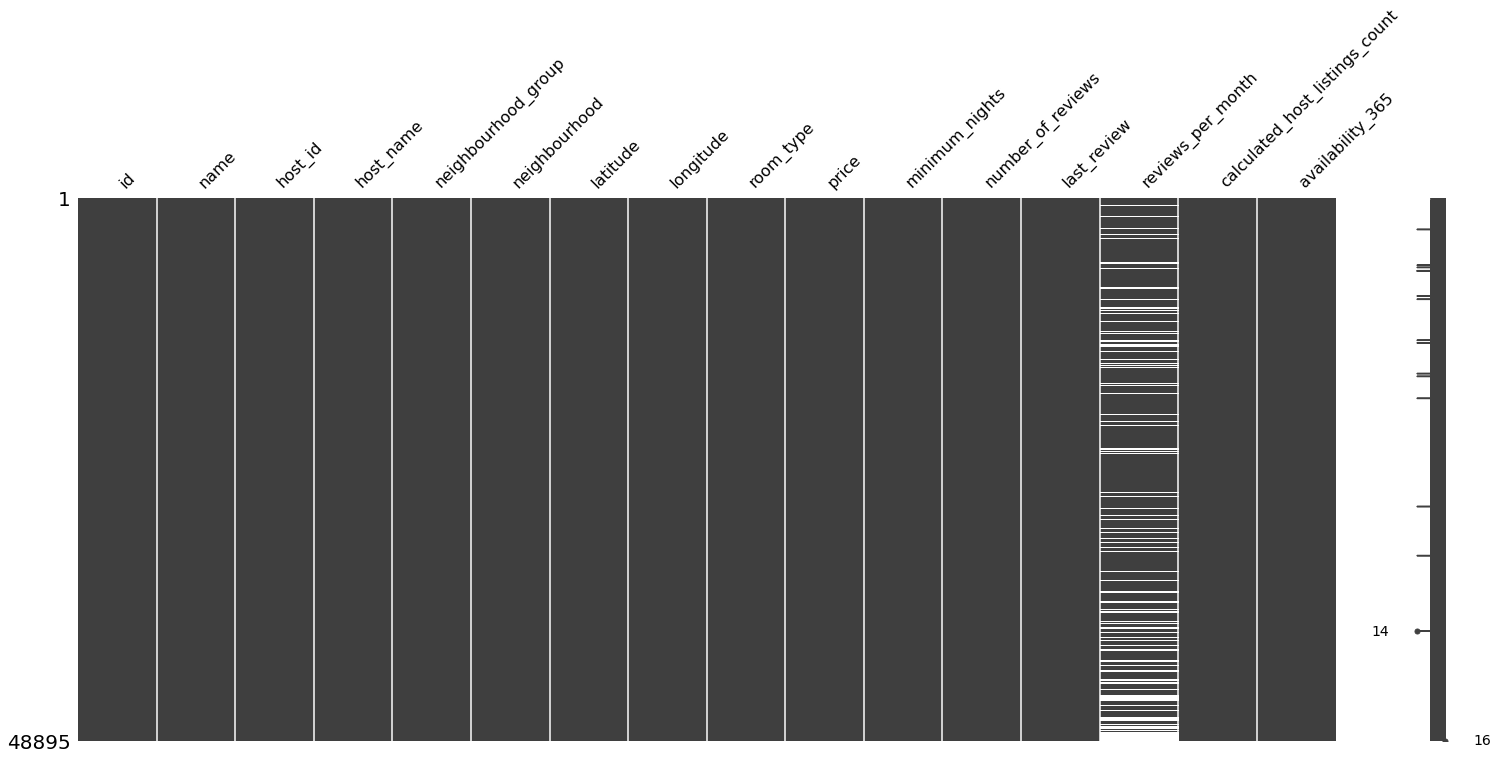

In [216]:
msno.matrix(df_copy)

In [217]:
percentage_of_missing_values = np.round(sum(df['reviews_per_month'].isna()) / len(df['reviews_per_month']) * 100, 2)
missing_values_colored = colored(percentage_of_missing_values, 'green')
colored_feature = colored('reviews_per_month', "blue")
print("The percentage of missing values for '" + colored_feature + "' feature is: {}%".format(missing_values_colored))

The percentage of missing values for 'reviews_per_month' feature is: 20.56%


In [218]:
df_copy['reviews_per_month']

0        0.21
1        0.38
2         NaN
3        4.64
4        0.10
         ... 
48890     NaN
48891     NaN
48892     NaN
48893     NaN
48894     NaN
Name: reviews_per_month, Length: 48895, dtype: float64

In [219]:
def mean_or_median_finder(data, feature, mean_impute = True):
    temp_data = data.copy()
    temp_data.dropna(inplace = True)
    if mean_impute: 
        mean_of_series = np.mean(temp_data[feature])
        return temp_data, mean_of_series
    else:
        median_of_series = np.median(temp_data[feature])
        return temp_data, median_of_series


In [220]:
temp_data, mean_reviews = mean_or_median_finder(df_copy, feature = 'reviews_per_month', mean_impute = True)

In [221]:
temp_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


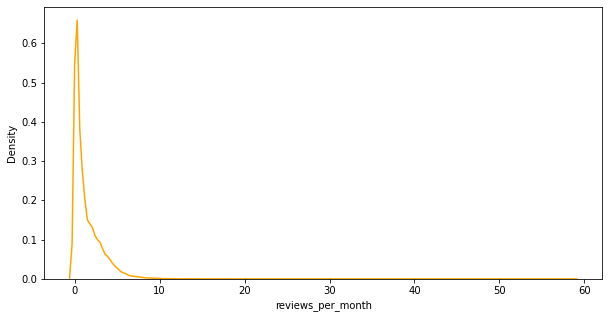

In [222]:
plt.figure(figsize = (10, 5))
sns.kdeplot(x = 'reviews_per_month', data = temp_data, color = 'orange')
plt.show()

In [223]:
temp_data, median_reviews = mean_or_median_finder(data = df_copy, feature = 'reviews_per_month', mean_impute = False)

In [224]:
median_reviews

0.72

In [225]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-01,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [226]:
df_copy['reviews_per_month'] = df_copy['reviews_per_month'].fillna(median_reviews)

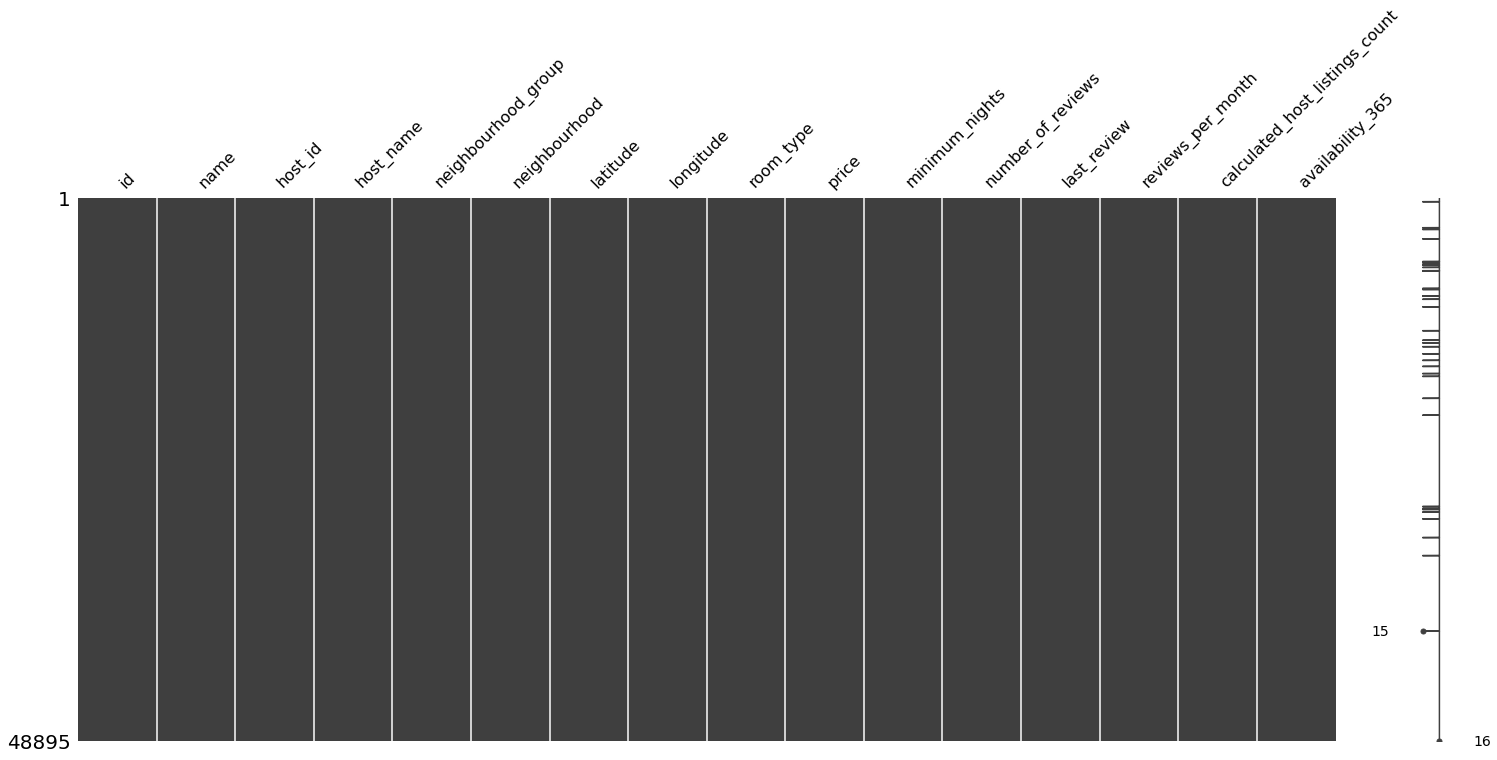

In [227]:
msno.matrix(df_copy)
plt.show()

In [228]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-01,0.72,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [229]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-01,0.72,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [230]:
df_copy['last_review_year'] = df_copy['last_review'].apply(lambda x: x[0: 4])
df_copy['last_review_month'] = df_copy['last_review'].apply(lambda x: x[5: 7])

In [231]:
df_copy['last_review_year']

0        2018
1        2019
2        2019
3        2019
4        2018
         ... 
48890    2019
48891    2019
48892    2019
48893    2019
48894    2019
Name: last_review_year, Length: 48895, dtype: object

In [232]:
df_copy['last_review_month']

0        10
1        05
2        06
3        07
4        11
         ..
48890    06
48891    06
48892    06
48893    06
48894    06
Name: last_review_month, Length: 48895, dtype: object

In [233]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2018,10
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2019,05
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-01,0.72,1,365,2019,06
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2019,07
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2018,11


In [234]:
df_copy.drop('last_review', axis = 1, inplace = True)

In [235]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018,10
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019,05
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,1,365,2019,06
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019,07
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018,11


In [236]:
len(df_copy['host_id'].unique())

37457

In [237]:
len(df_copy['id'].unique())

48895

In [238]:
df_copy['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

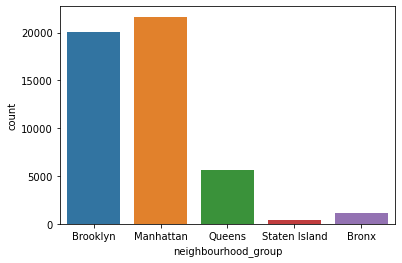

In [239]:
sns.countplot(x = 'neighbourhood_group', data = df_copy)
plt.show()

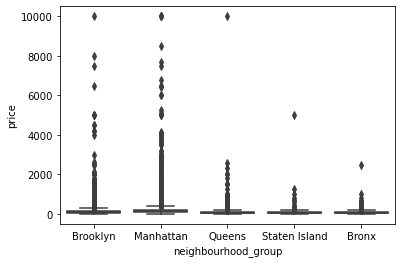

In [240]:
sns.boxplot(x = 'neighbourhood_group', y = 'price', data = df_copy)
plt.show()

In [241]:
np.percentile(df_copy['price'], 50)

106.0

In [242]:
np.percentile(df_copy['price'], 99)

799.0

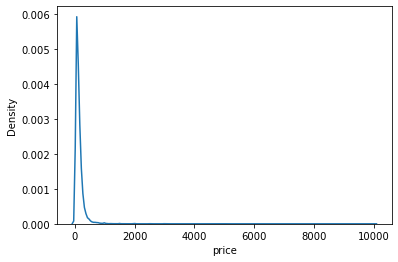

In [243]:
sns.kdeplot(df_copy['price'])
plt.show()

In [244]:
len(df_copy['price'])

48895

In [245]:
def outliers_remover(data, feature, remove_outliers = True):
    
    temp_data = data.copy()
    if remove_outliers:
        q1 = np.percentile(temp_data[feature], 25)
        q3 = np.percentile(temp_data[feature], 75)
        IQR = q3 - q1
        upper_limit = q3 + 1.5 * IQR
        lower_limit = q1 - 1.5 * IQR
        outliers = temp_data[(temp_data[feature] < lower_limit) | (temp_data[feature] > upper_limit)]
        temp_data_outliers_removed = temp_data[(temp_data[feature] > lower_limit) | (temp_data[feature] < upper_limit)]
        outliers_removed = len(outliers[feature])
        print("The percentage of outliers removed: {}%".format((outliers_removed) / len(temp_data) * 100))
        return outliers, temp_data_outliers_removed
    else:
        return temp_data
    

In [246]:
outliers, df_copy = outliers_remover(df_copy, feature = 'price')

The percentage of outliers removed: 6.078331117701197%


In [247]:
outliers.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,0.12,1,180,2018,11
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,0.24,1,7,2016,08
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,0.55,2,243,2019,05
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,0.06,4,298,2017,08
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,0.24,2,216,2018,12


<AxesSubplot:xlabel='price', ylabel='Density'>

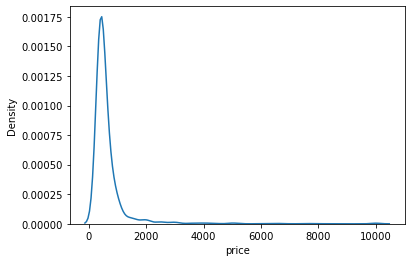

In [248]:
sns.kdeplot(outliers['price'])

In [249]:
len(outliers)

2972

<AxesSubplot:xlabel='price', ylabel='Density'>

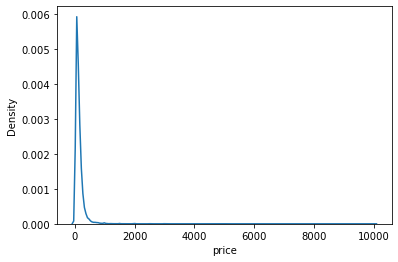

In [250]:
sns.kdeplot(df_copy['price'])

In [251]:
df_copy.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018,10
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019,05
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,1,365,2019,06
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019,07
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018,11


In [254]:
df_copy.drop(['name', 'host_id', 'host_name', 'id'], axis = 1, inplace = True)

In [255]:
df_copy.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,2018,10
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019,05
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.72,1,365,2019,06
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,2019,07
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,2018,11


In [285]:
df_copy.shape

(48895, 13)

In [286]:
df_copy = pd.get_dummies(df_copy, columns = ['neighbourhood_group', 'neighbourhood', 'room_type'], drop_first = True)

# This is where we would implement Decision Trees, Random Forests and Neural Networks

In [287]:
from sklearn.model_selection import train_test_split

In [288]:
X = df_copy.drop(['price'], axis = 1)
y = df_copy['price']

In [289]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [290]:
X_train.shape

(39116, 235)

In [291]:
X_test.shape

(9779, 235)

In [293]:
from sklearn.preprocessing import StandardScaler

In [295]:
scaler = StandardScaler()

In [296]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [396]:
X_train_scaled[0: 5]

array([[-0.28388518, -0.78208672, -0.29979986, ..., -0.06912168,
         1.08970228, -0.15700204],
       [-0.39462628,  0.23838285, -0.29979986, ..., -0.06912168,
         1.08970228, -0.15700204],
       [ 1.25767495,  0.43595578, -0.20032813, ..., -0.06912168,
        -0.91768184, -0.15700204],
       [ 0.67274893,  0.56745514, -0.20032813, ..., -0.06912168,
         1.08970228, -0.15700204],
       [-1.03262722, -0.14078443,  0.39650227, ..., -0.06912168,
        -0.91768184, -0.15700204]])

# Dataset ready to train

In [352]:
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm

In [386]:
max_depth_values = [2, 3, 4, 5, 8, 10, 12, 15]
cross_validation_error_values = []
cv = 10
for depth in tqdm(max_depth_values):
    model = DecisionTreeRegressor()
    cross_validation_error = -cross_val_score(model, X_train_scaled, y_train, scoring = 'neg_mean_squared_error', cv = cv).mean()
    cross_validation_error_values.append(cross_validation_error)
print(cross_validation_error_values)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [01:09<00:00,  8.69s/it]

[93818.210520841, 96823.66324309312, 91517.4028380573, 91371.5888699889, 107619.33034020243, 101250.39989971131, 89848.12993794963, 93350.10790399529]


In [387]:
def lineplot_function_tree(x_value, y_value, font_size = 15):
    plt.figure(figsize = (10, 10))
    plt.plot(x_value, y_value)
    sns.scatterplot(x = x_value, y = y_value, color = 'red')
    plt.xlabel('Max Depth Values')
    plt.ylabel('Cross Validation Error Values')
    plt.title('Max Depth Values Vs Cross Validation Error Values', fontsize = font_size)
    plt.show()

In [388]:
cross_validation_error_values

[93818.210520841,
 96823.66324309312,
 91517.4028380573,
 91371.5888699889,
 107619.33034020243,
 101250.39989971131,
 89848.12993794963,
 93350.10790399529]

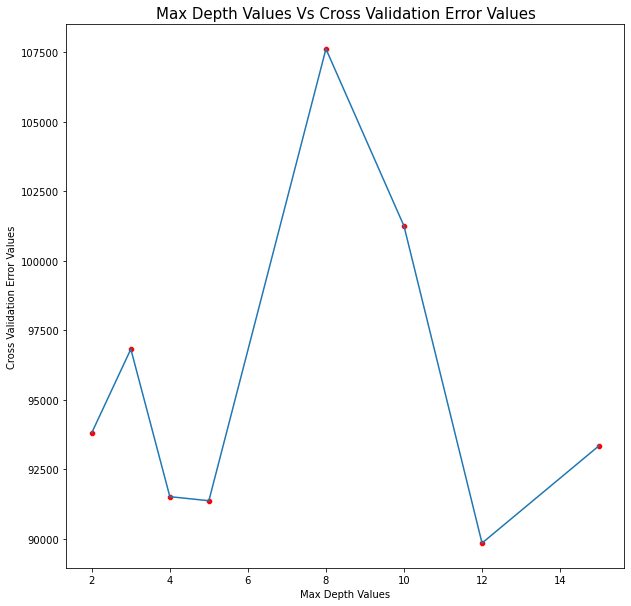

In [389]:
lineplot_function_tree(x_value = max_depth_values, y_value = cross_validation_error_values)

In [375]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import cross_val_score
import seaborn as sns 
from sklearn import tree

In [376]:
best_max_depth = 5

In [390]:
model = DecisionTreeRegressor(max_depth = best_max_depth)
model.fit(X_train_scaled, y_train)
y_predictions = model.predict(X_test_scaled)

In [391]:
min_samples_leaf_values = [15, 20, 50, 75, 100, 150, 200, 400, 500]
MSE_values = []
cv = 10
for min_samples_leaf in tqdm(min_samples_leaf_values):
    model = DecisionTreeRegressor(min_samples_leaf = min_samples_leaf, random_state = 101)
    cross_validation_scores = -cross_val_score(model, X_train_scaled, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    MSE_values.append(cross_validation_scores)   

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:51<00:00,  5.68s/it]


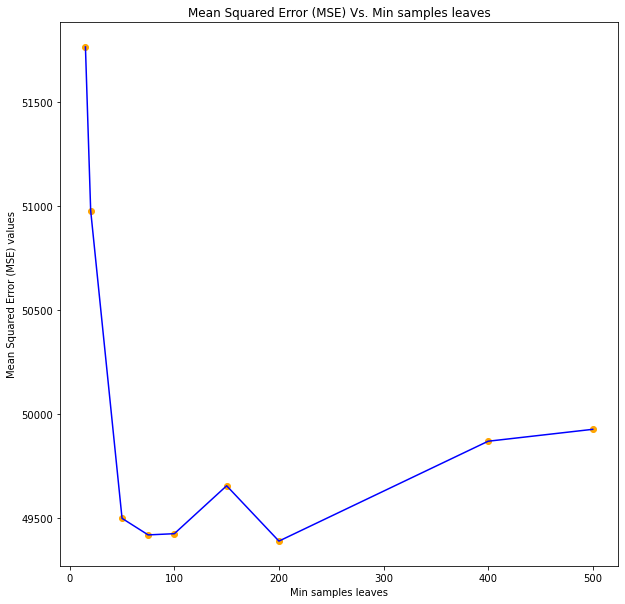

In [392]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = min_samples_leaf_values, y = MSE_values, color = 'blue')
plt.scatter(x = min_samples_leaf_values, y = MSE_values, color = 'orange')
plt.xlabel("Min samples leaves")
plt.ylabel("Mean Squared Error (MSE) values")
plt.title("Mean Squared Error (MSE) Vs. Min samples leaves")
plt.show()

In [394]:
min_samples_split_values = [15, 20, 50, 75, 100, 150, 200, 400, 500]
MSE_values = []
cv = 10
for min_samples in tqdm(min_samples_split_values):
    model = DecisionTreeRegressor(min_samples_split = min_samples, random_state = 101)
    cross_validation_scores = -cross_val_score(model, X_train_scaled, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    MSE_values.append(cross_validation_scores)
    

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [01:04<00:00,  7.14s/it]


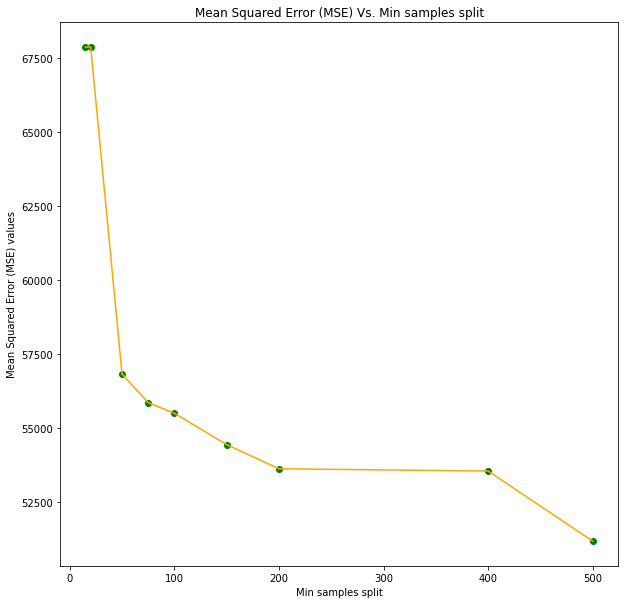

In [395]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = min_samples_split_values, y = MSE_values, color = 'orange')
plt.scatter(x = min_samples_split_values, y = MSE_values, color = 'green')
plt.xlabel("Min samples split")
plt.ylabel("Mean Squared Error (MSE) values")
plt.title("Mean Squared Error (MSE) Vs. Min samples split")
plt.show()

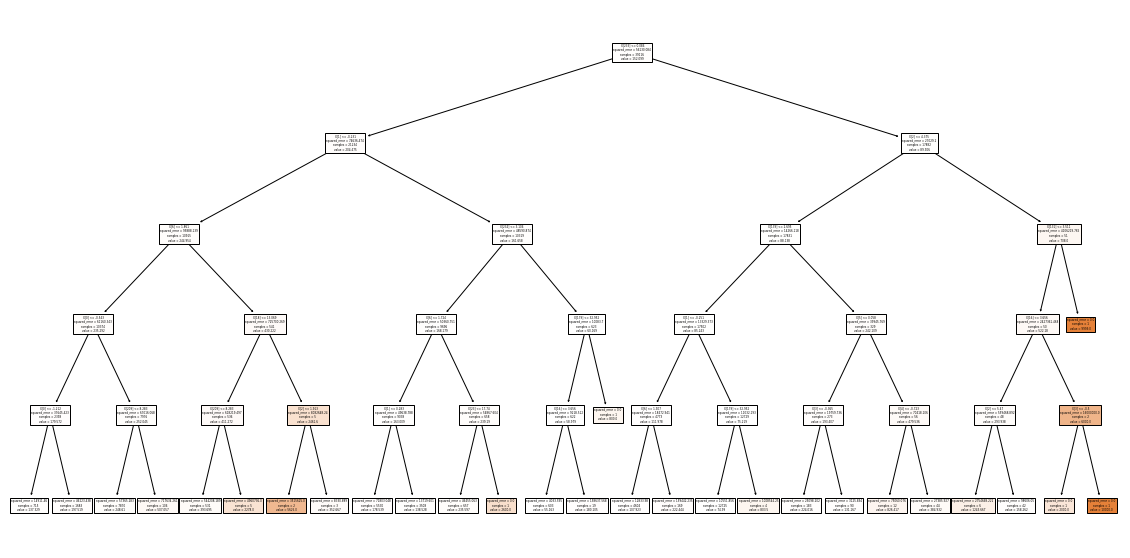

In [378]:
plt.figure(figsize = (20, 10))
tree.plot_tree(model, filled = True)
plt.show()

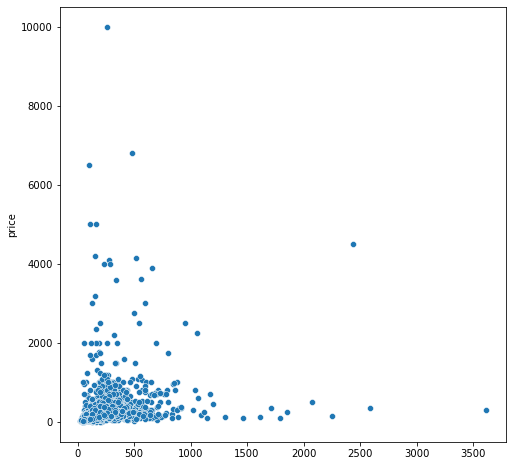

In [329]:
plt.figure(figsize = (8, 8))
sns.scatterplot(x = y_predictions, y = y_test)
plt.show()

In [316]:
mean_squared_error(y_predictions, y_test)

90826.40433582166

In [317]:
mean_absolute_error(y_predictions, y_test)

86.59228960016361

In [318]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
tree_depth_values = [2, 3, 4, 5, 10, 15]
cv = 10
MSE_values = []
for depth in tree_depth_values:
    model = DecisionTreeRegressor(max_depth = depth, random_state = 101)
    cross_validation_scores = -cross_val_score(model, X_train, y_train, cv = cv, scoring = 'neg_mean_squared_error').mean()
    MSE_values.append(cross_validation_scores)    

In [319]:
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)
y_predictions = model.predict(X_test_scaled)

In [320]:
mean_squared_error(y_predictions, y_test)

57343.39330411113

In [321]:
mean_absolute_error(y_predictions, y_test)

68.38924753723965